In [26]:
from ilsmc.optimizer import trans_emiss_calc
import pandas as pd


t_1 = 2e5
t_2 = 4e4
t_upper = 5e5 
N_AB = 30000
N_ABC = 40000
r = 1e-8
mu = 2e-8
n_int_AB = 3
n_int_ABC = 3

transitions, emissions, starting, hidden_states, observed_states = trans_emiss_calc(
    t_1, t_2, t_upper, 
    N_AB, N_ABC, 
    r, mu, n_int_AB, n_int_ABC)



In [16]:
%load_ext rpy2.ipython

In [2]:
# for i in range(len(observed_states)):
#     print(observed_states[i], emissions[3][i])

In [27]:
emissions[0][0]*4

0.9404186316637785

In [28]:
starting[2:].sum()

0.8363549195812727

In [29]:
import numpy as np

(2/3)*(np.exp(-t_2/(N_AB)))

0.1757314254104845

In [30]:
import numpy as np

np.random.seed(1)

n_sim = 100000
H = np.zeros(n_sim, dtype = np.int16)
E = np.zeros(n_sim, dtype = np.int16)
h = np.random.choice(
    list(range(len(hidden_states))),
    p = list(starting)
)
H[0] = h
e = np.random.choice(
    list(range(len(observed_states))),
    p = emissions[H[0]]
)
E[0] = e

for i in range(1, n_sim):
    h = np.random.choice(
        list(range(len(hidden_states))),
        p = transitions[H[i-1]]
    )
    e = np.random.choice(
        list(range(len(observed_states))),
        p = emissions[h]
    )
    E[i] = e
    H[i] = h



# Exploring the likelihood function

In [31]:
from ilsmc.optimizer import forward_loglik

t_2_range = np.linspace(2e4, 6e4, num = 5)
N_AB_range = np.linspace(10000, 50000, num = 5)
lst = []
for t in t_2_range:
    print(t)
    for N in N_AB_range:
        tra, emi, sta, hid, obs = trans_emiss_calc(
            t_1, t, t_upper, 
            N, N_ABC, 
            r, mu, n_int_AB, n_int_ABC)
        lst.append([t, N, forward_loglik(tra, emi, sta, E)])

20000.0
30000.0
40000.0
50000.0
60000.0


In [32]:
pd_lst = pd.DataFrame(lst)
pd_lst

,0,1,2
0,20000.0,10000.0,-175816.304418
1,20000.0,20000.0,-175783.400241
2,20000.0,30000.0,-175766.065668
3,20000.0,40000.0,-175764.168531
4,20000.0,50000.0,-175778.760381
5,30000.0,10000.0,-175793.778936
6,30000.0,20000.0,-175764.450963
7,30000.0,30000.0,-175753.344101
8,30000.0,40000.0,-175756.978433
9,30000.0,50000.0,-175776.185465


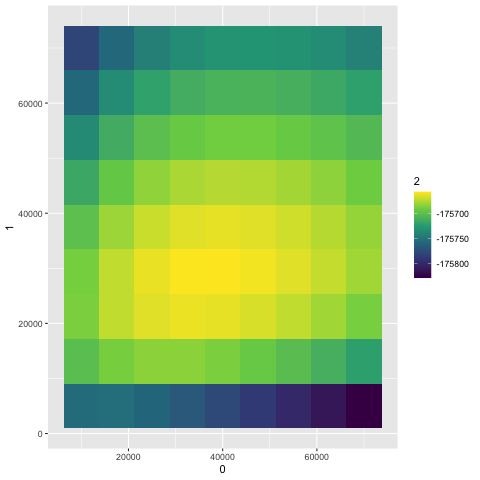

In [ ]:
%%R -i pd_lst

library(tidyverse)

pd_lst %>%
    as_tibble() %>%
    ggplot() +
    geom_tile(aes(`0`, `1`, fill = `2`)) +
    scale_fill_viridis_c()

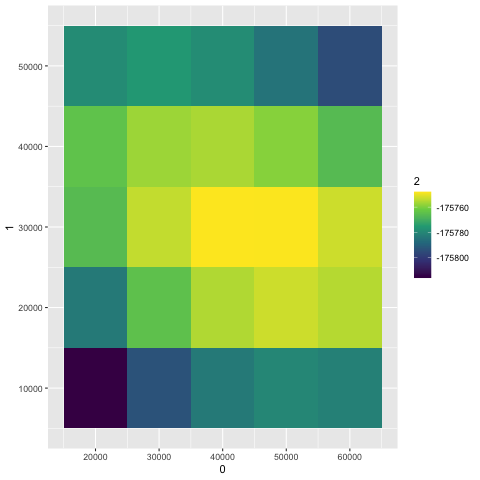

In [33]:
%%R -i pd_lst

library(tidyverse)

pd_lst %>%
    as_tibble() %>%
    ggplot() +
    geom_tile(aes(`0`, `1`, fill = `2`)) +
    scale_fill_viridis_c()

# Optimizing

In [24]:
# ''.join([str(i) for i in H])

In [22]:
from ilsmc.optimizer import forward_loglik

# print(forward_loglik(transitions, emissions, starting, np.random.choice(list(range(len(observed_states))), n_sim)))

print(forward_loglik(transitions, emissions, starting, E))

-175747.81911620413


In [7]:
[2e5, 5e4, 2e5, 50000, 60000, 1e-8, 5e-9]

[200000.0, 50000.0, 200000.0, 50000, 60000, 1e-08, 5e-09]

In [25]:
from ilsmc.optimizer import optimizer

t_init_1 = 2.5e5
t_init_2 = 3.5e4
t_init_upper = 5.5e5
N_init = 35000
r_init = 1.5e-8
mu_init = 4e-8


res = optimizer(t_init_1, t_init_2, t_init_upper, 
                N_init, N_init, 
                r_init, mu_init, 
                3, 3, E, 'test_nelder_mead_new', True)

   0    2.50000e+05    3.50000e+04    5.50000e+04    3.50000e+04    3.50000e+04    1.50000e-08    4.00000e-08   -176721.811639
   1    2.62500e+05    3.50000e+04    5.50000e+04    3.50000e+04    3.50000e+04    1.50000e-08    4.00000e-08   -176826.722364
   2    2.50000e+05    3.67500e+04    5.50000e+04    3.50000e+04    3.50000e+04    1.50000e-08    4.00000e-08   -176729.181954
   3    2.50000e+05    3.50000e+04    5.77500e+04    3.50000e+04    3.50000e+04    1.50000e-08    4.00000e-08   -176718.349702
   4    2.50000e+05    3.50000e+04    5.50000e+04    3.67500e+04    3.50000e+04    1.50000e-08    4.00000e-08   -176728.811442
   5    2.50000e+05    3.50000e+04    5.50000e+04    3.50000e+04    3.67500e+04    1.50000e-08    4.00000e-08   -176718.331644
   6    2.50000e+05    3.50000e+04    5.50000e+04    3.50000e+04    3.50000e+04    1.57500e-08    4.00000e-08   -176724.772596
   7    2.50000e+05    3.50000e+04    5.50000e+04    3.50000e+04    3.50000e+04    1.50000e-08    4.20000e-08  

KeyboardInterrupt: 

In [ ]:
[       2e5,           4e4,           5e5,           3e4,           4e4,           1e-8,          2e-8,         -175747.81911620413]

In [12]:
from ilsmc.optimizer import optimizer_lipo

res = optimizer_lipo(1, 1, E, 'lipo_test_long', verbose = True)

   0    1.00500e+06    1.00500e+06    1.00500e+06    5.05000e+04    5.05000e+04    5.05000e-08    5.05000e-08   -222434.542288
   1    4.74213e+05    1.52767e+06    3.01322e+05    2.88984e+04    4.49005e+04    1.43687e-08    5.72816e-08   -215984.578596
   2    1.20853e+06    1.08121e+06    1.57303e+06    9.34855e+04    6.94337e+04    3.44292e-08    6.83451e-08   -262428.285213
   3    9.94022e+04    5.56114e+05    1.18754e+06    2.54385e+04    1.72512e+04    7.91054e-08    6.08746e-08   -198635.388469
   4    1.01385e+06    1.84668e+06    8.44413e+05    4.86934e+04    5.75381e+04    2.81296e-08    1.79807e-08   -190644.120743
   5    1.10127e+06    7.75175e+05    1.96973e+05    2.77041e+04    6.37207e+03    1.45479e-08    5.21771e-08   -211412.289520
   6    1.15015e+06    2.61014e+05    1.61394e+06    1.20525e+04    3.97739e+04    7.77608e-08    9.11813e-08   -262803.361320
   7    1.15579e+05    1.21645e+06    7.22037e+04    5.55562e+03    4.96765e+03    5.53883e-08    1.21230e-09  

/Users/au595587/opt/miniconda3/envs/phasetype/lib/python3.8/site-packages/ilsmc/get_emission_prob_mat.py:250: RuntimeWarning: overflow encountered in exp
  np.exp(2*(1 + mu)*t)*
/Users/au595587/opt/miniconda3/envs/phasetype/lib/python3.8/site-packages/ilsmc/get_emission_prob_mat.py:252: RuntimeWarning: overflow encountered in exp
  (np.exp(2*t)*(-6 + mu + mu**2)) -
/Users/au595587/opt/miniconda3/envs/phasetype/lib/python3.8/site-packages/ilsmc/get_emission_prob_mat.py:261: RuntimeWarning: overflow encountered in exp
  (np.exp(2*t)*(-3 + mu)*
/Users/au595587/opt/miniconda3/envs/phasetype/lib/python3.8/site-packages/ilsmc/get_emission_prob_mat.py:273: RuntimeWarning: overflow encountered in exp
  3*np.exp(2*t + mu*t)*(-2 + mu)*
/Users/au595587/opt/miniconda3/envs/phasetype/lib/python3.8/site-packages/ilsmc/get_emission_prob_mat.py:277: RuntimeWarning: overflow encountered in exp
  48*np.exp(2*t)*epsilon*
/Users/au595587/opt/miniconda3/envs/phasetype/lib/python3.8/site-packages/ilsmc/get_

   9    1.00000e+04    1.00000e+04    5.85046e+05    1.00000e+03    1.00000e+03    1.00000e-07    1.00000e-09    nan
  10    8.95114e+05    3.04378e+05    1.83711e+05    8.58472e+04    3.94806e+03    8.68426e-08    8.60846e-08   -218631.070746
  11    1.06385e+06    1.08278e+06    1.28866e+06    1.48421e+04    4.61290e+04    2.99326e-08    8.72484e-08   -274593.398236
  12    5.94651e+05    1.82513e+06    1.09553e+06    3.92719e+04    4.64363e+04    7.94755e-09    3.65474e-08   -210702.399250
  13    1.90035e+06    1.38515e+06    5.83601e+05    8.38440e+04    4.18998e+04    5.75199e-08    1.36847e-08   -187790.656446
  14    5.86180e+05    1.24606e+06    1.45478e+06    1.42742e+04    2.19063e+04    2.87512e-08    3.92704e-08   -208380.374549
  15    1.57024e+06    1.93758e+06    9.30880e+05    5.17839e+04    4.33826e+04    7.74241e-08    7.09671e-08   -288915.147599
  16    9.13406e+05    1.69052e+06    1.38543e+06    1.61508e+04    1.12056e+04    5.61701e-08    2.89313e-08   -205825.3

/Users/au595587/opt/miniconda3/envs/phasetype/lib/python3.8/site-packages/ilsmc/optimizer.py:67: RuntimeWarning: invalid value encountered in true_divide
  a = arr/pi[:,None]
/Users/au595587/opt/miniconda3/envs/phasetype/lib/python3.8/site-packages/ilsmc/get_emission_prob_mat.py:95: RuntimeWarning: overflow encountered in exp
  (1 + mu)*(1 + 2*mu)))/np.exp(t))/(64*(1 - np.exp(-t)))
/Users/au595587/opt/miniconda3/envs/phasetype/lib/python3.8/site-packages/ilsmc/optimizer.py:11: RuntimeWarning: divide by zero encountered in log
  alpha[0, :] = np.log(pi * b[:, V[0]])


  86    2.00000e+06    8.37922e+05    1.00000e+04    1.00000e+03    1.00000e+05    1.00000e-09    1.00000e-09    nan
  87    1.51861e+06    1.98440e+06    7.60735e+05    4.56125e+04    5.48000e+04    7.34961e-08    9.64396e-08   -326168.944757
  88    2.00000e+06    8.37922e+05    1.00000e+04    1.00000e+03    1.00000e+05    1.00000e-09    1.00000e-09    nan
  89    1.68566e+06    8.10947e+05    1.36750e+06    2.73858e+04    9.50220e+04    6.80005e-08    7.84459e-08   -282771.176391
  90    1.00000e+04    4.00988e+05    2.00000e+06    1.00000e+05    1.00000e+03    1.00000e-09    1.00000e-07   -231000.316392
  91    1.21824e+05    1.31348e+06    1.33534e+06    9.00980e+04    9.66603e+04    6.92847e-08    6.80170e-08   -227223.890130
  92    3.84210e+05    4.40306e+05    1.51120e+06    1.00000e+05    1.00000e+03    1.00000e-09    1.00000e-07   -239217.202622
  93    2.89700e+05    1.40183e+06    1.39393e+06    1.32223e+04    3.16659e+04    5.66809e-08    7.69332e-08   -242673.412359
  94

KeyboardInterrupt: 

In [ ]:
[       2e5,           4e4,           5e5,           3e4,           4e4,           1e-8,          2e-8,         -175747.81911620413]

In [18]:
res

[985704.6851919036,
 356745.96140490833,
 815988.9958262986,
 47512.007034729715,
 97252.71234643224,
 3.966341534419258e-08,
 7.064966303376517e-09]

In [19]:
y

NameError: name 'y' is not defined

In [7]:
# Warning: Maximum number of function evaluations has been exceeded.

res

(array([1.00002633e+05, 1.00000000e+05, 9.99973666e+04, 5.49990369e+04,
        5.49999935e+04, 1.42453902e-08, 7.57059690e-09]),
 704,
 1)

In [8]:
# Warning: Maximum number of function evaluations has been exceeded.
[2.93483617e+00, 1.14608394e+00, 3.66571226e+00, 1.31255491e+04, 2.59959948e+04, 1.46740104e-07, 5.34022264e-03]

[2.93483617,
 1.14608394,
 3.66571226,
 13125.5491,
 25995.9948,
 1.46740104e-07,
 0.00534022264]

In [7]:
res_2 = optimizer(9.999940,    9.999940,    9.999940,    2501.883963,    49997.226299 ,   0.000004 ,   0.001120 , 1, 1, E)

   0    9.999940    9.999940    9.999940    2501.883963    49997.226299    0.000004    0.001120   -201097.713500
   1    3.825840    9.999940    9.999940    2501.883963    49997.226299    0.000004    0.001120   -201968.145088
   2    6.184160    9.999940    9.999940    2501.883963    49997.226299    0.000004    0.001120   -201467.173059
   3    7.641681    9.999940    9.999940    2501.883963    49997.226299    0.000004    0.001120   -201277.803044
   4    8.542479    9.999940    9.999940    2501.883963    49997.226299    0.000004    0.001120   -201193.041503
   5    9.099202    9.999940    9.999940    2501.883963    49997.226299    0.000004    0.001120   -201150.992491
   6    9.443276    9.999940    9.999940    2501.883963    49997.226299    0.000004    0.001120   -201128.584954
   7    9.655926    9.999940    9.999940    2501.883963    49997.226299    0.000004    0.001120   -201116.028107
   8    9.787350    9.999940    9.999940    2501.883963    49997.226299    0.000004    0.001120 

KeyboardInterrupt: 

In [13]:
res_2

 final_simplex: (array([[3.33423053e+00, 1.10404088e+00, 5.38036886e+00, 1.30237471e+04,
        2.02207605e+04, 1.03343727e-07, 4.66517420e-03],
       [3.33423053e+00, 1.10404088e+00, 5.38036886e+00, 1.30237471e+04,
        2.02207605e+04, 1.03343726e-07, 4.66517420e-03],
       [3.33423053e+00, 1.10404088e+00, 5.38036886e+00, 1.30237472e+04,
        2.02207605e+04, 1.03343726e-07, 4.66517421e-03],
       [3.33423053e+00, 1.10404088e+00, 5.38036886e+00, 1.30237472e+04,
        2.02207606e+04, 1.03343726e-07, 4.66517421e-03],
       [3.33423053e+00, 1.10404088e+00, 5.38036886e+00, 1.30237472e+04,
        2.02207606e+04, 1.03343726e-07, 4.66517421e-03],
       [3.33423053e+00, 1.10404088e+00, 5.38036886e+00, 1.30237471e+04,
        2.02207605e+04, 1.03343726e-07, 4.66517420e-03],
       [3.33423053e+00, 1.10404088e+00, 5.38036886e+00, 1.30237471e+04,
        2.02207605e+04, 1.03343727e-07, 4.66517420e-03],
       [3.33423053e+00, 1.10404088e+00, 5.38036886e+00, 1.30237471e+04,
        

In [22]:
np.array([3, 1, 5, 20000, 30000, 0.00000005, 0.005])
# rho_AB
2*30000*0.00000005

0.003

In [15]:
res_2.x

array([3.33423053e+00, 1.10404088e+00, 5.38036886e+00, 1.30237471e+04,
       2.02207605e+04, 1.03343727e-07, 4.66517420e-03])

In [21]:
2*1.30237471e+04*0.000000103343727
2*2.02207605e+04*0.000000103343727

0.0041793775056887675

# Posterior decoding

In [ ]:
from ilsmc.get_joint_prob_mat import get_joint_prob_mat
import pandas as pd
from ilsmc.cutpoints import cutpoints_AB, cutpoints_ABC
import numpy as np
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [163]:
t_1 = 2e5
t_2 = 4e4
t_upper = 5e5 
N_AB = 30000
N_ABC = 40000
r = 5e-9
mu = 2e-8
n_int_AB = 2
n_int_ABC = 3

# Reference Ne (for normalization)
N_ref = N_AB
# Speciation times (in coalescent units, i.e. number of generations / N_ref)
t_A = t_1/N_ref
t_B = t_1/N_ref
t_AB = t_2/N_ref
t_C = (t_1+t_2)/N_ref
t_upper = t_upper/N_ref
t_peak = 2*(N_ABC/N_ref)
# Recombination rates (r = rec. rate per site per generation)
rho_A = 2*N_ref*r
rho_B = 2*N_ref*r
rho_AB = 2*N_ref*r
rho_C = 2*N_ref*r
rho_ABC = 2*N_ref*r
# Coalescent rates
coal_A = N_ref/N_ref
coal_B = N_ref/N_ref
coal_AB = N_AB/N_ref
coal_C = N_ref/N_ref
coal_ABC = N_ABC/N_ref
# Mutation rates (mu = mut. rate per site per generation)
mu_A = 2*N_ref*mu
mu_B = 2*N_ref*mu
mu_C = 2*N_ref*mu
mu_D = 2*N_ref*mu
mu_AB = 2*N_ref*mu
mu_ABC = 2*N_ref*mu

In [165]:
import numpy as np

(2/3)*(np.exp(-t_2/(N_AB)))

0.1757314254104845

In [166]:
transitions = get_joint_prob_mat(
    t_A,    t_B,    t_AB,    t_C, 
    rho_A,  rho_B,  rho_AB,  rho_C,  rho_ABC, 
    coal_A, coal_B, coal_AB, coal_C, coal_ABC,
    n_int_AB, n_int_ABC
)

In [167]:
transitions

array([[(0, 0, 0), (0, 0, 0), 0.12264468758372525],
       [(0, 0, 0), (0, 0, 1), 2.0600829495135207e-05],
       [(0, 0, 1), (0, 0, 0), 2.0600829495135207e-05],
       ...,
       [(3, 2, 2), (1, 2, 2), 3.3463505929297113e-07],
       [(3, 2, 2), (2, 2, 2), 3.375582265103031e-07],
       [(3, 2, 2), (3, 2, 2), 0.0032494265994839934]], dtype=object)

In [168]:
trans_example = transitions.copy()
trans_example[:,0] = [str(i) for i in trans_example[:,0]]
trans_example[:,1] = [str(i) for i in trans_example[:,1]]
trans_example[0:10,:]

array([['(0, 0, 0)', '(0, 0, 0)', 0.12264468758372525],
       ['(0, 0, 0)', '(0, 0, 1)', 2.0600829495135207e-05],
       ['(0, 0, 1)', '(0, 0, 0)', 2.0600829495135207e-05],
       ['(0, 0, 0)', '(0, 0, 2)', 2.060082949513521e-05],
       ['(0, 0, 2)', '(0, 0, 0)', 2.060082949513521e-05],
       ['(0, 0, 1)', '(0, 0, 1)', 0.1226405156995295],
       ['(0, 0, 1)', '(0, 0, 2)', 2.4772713690807474e-05],
       ['(0, 0, 2)', '(0, 0, 1)', 2.4772713690807474e-05],
       ['(0, 0, 2)', '(0, 0, 2)', 0.12264051569952945],
       ['(0, 0, 0)', '(0, 1, 0)', 2.7918265436095083e-05]], dtype=object)

In [169]:
cut_HMM_AB = cutpoints_AB(n_int_AB, t_AB, coal_AB)
cut_HMM_ABC = t_AB+cutpoints_ABC(n_int_ABC, coal_ABC)
trans_example = pd.DataFrame(transitions).pivot(index = 0, columns = 1, values = 2)
names_HMM = list(trans_example.index)
pi_HMM = list(trans_example.sum(axis=1))
trans_example = np.array(trans_example.div(pi_HMM, axis=0))
trans_example[0]

array([0.9992738534712471, 0.00016784966947919883, 0.00016784966947919886,
       0.00022747004565945732, 3.795880600739377e-08,
       3.7958806007393784e-08, 2.4126696261066836e-05,
       8.133702468352078e-09, 8.133702468352081e-09,
       1.9596926575556723e-09, 3.527446783600213e-09,
       7.838770630222701e-10, 2.412724789082499e-05,
       2.262123850655937e-05, 2.2621238506559374e-05,
       1.9596926575556723e-09, 3.527446783600212e-09,
       7.838770630222701e-10, 2.4127247890824988e-05,
       2.262123850655937e-05, 2.262123850655937e-05,
       1.9596926575556723e-09, 3.527446783600213e-09,
       7.838770630222701e-10], dtype=object)

In [182]:
np.random.seed(1)
np.random.seed(12)

n_pos = 100000

lst = np.zeros((n_pos, 5))
lst_2 = np.zeros((n_pos, 4))

lst_states = np.empty((n_pos), dtype = object)

idx = np.random.choice(
    list(range(len(pi_HMM))), 
    p = pi_HMM
)
for i in range(n_pos):
    lst_states[i] = names_HMM[idx]
    lst[i] = [
        # V0, V1, V2, V3
        names_HMM[idx][0], 
        cut_HMM_AB[names_HMM[idx][1]] if names_HMM[idx][0] == 0 else cut_HMM_ABC[names_HMM[idx][1]],
        cut_HMM_ABC[names_HMM[idx][2]],
        cut_HMM_AB[names_HMM[idx][1]+1] if names_HMM[idx][0] == 0 else cut_HMM_ABC[names_HMM[idx][1]+1],
        cut_HMM_ABC[names_HMM[idx][2]+1],
    ]
    lst_2[i] = [i, names_HMM[idx][0], names_HMM[idx][1], names_HMM[idx][2]]
    idx = np.random.choice(
        list(range(len(pi_HMM))), 
        p = list(trans_example[idx,:])
    )

df_HMM = pd.DataFrame(lst)

In [183]:
lst_states

array([(0, 0, 1), (0, 0, 1), (0, 0, 1), ..., (0, 0, 2), (0, 0, 2),
       (0, 0, 2)], dtype=object)

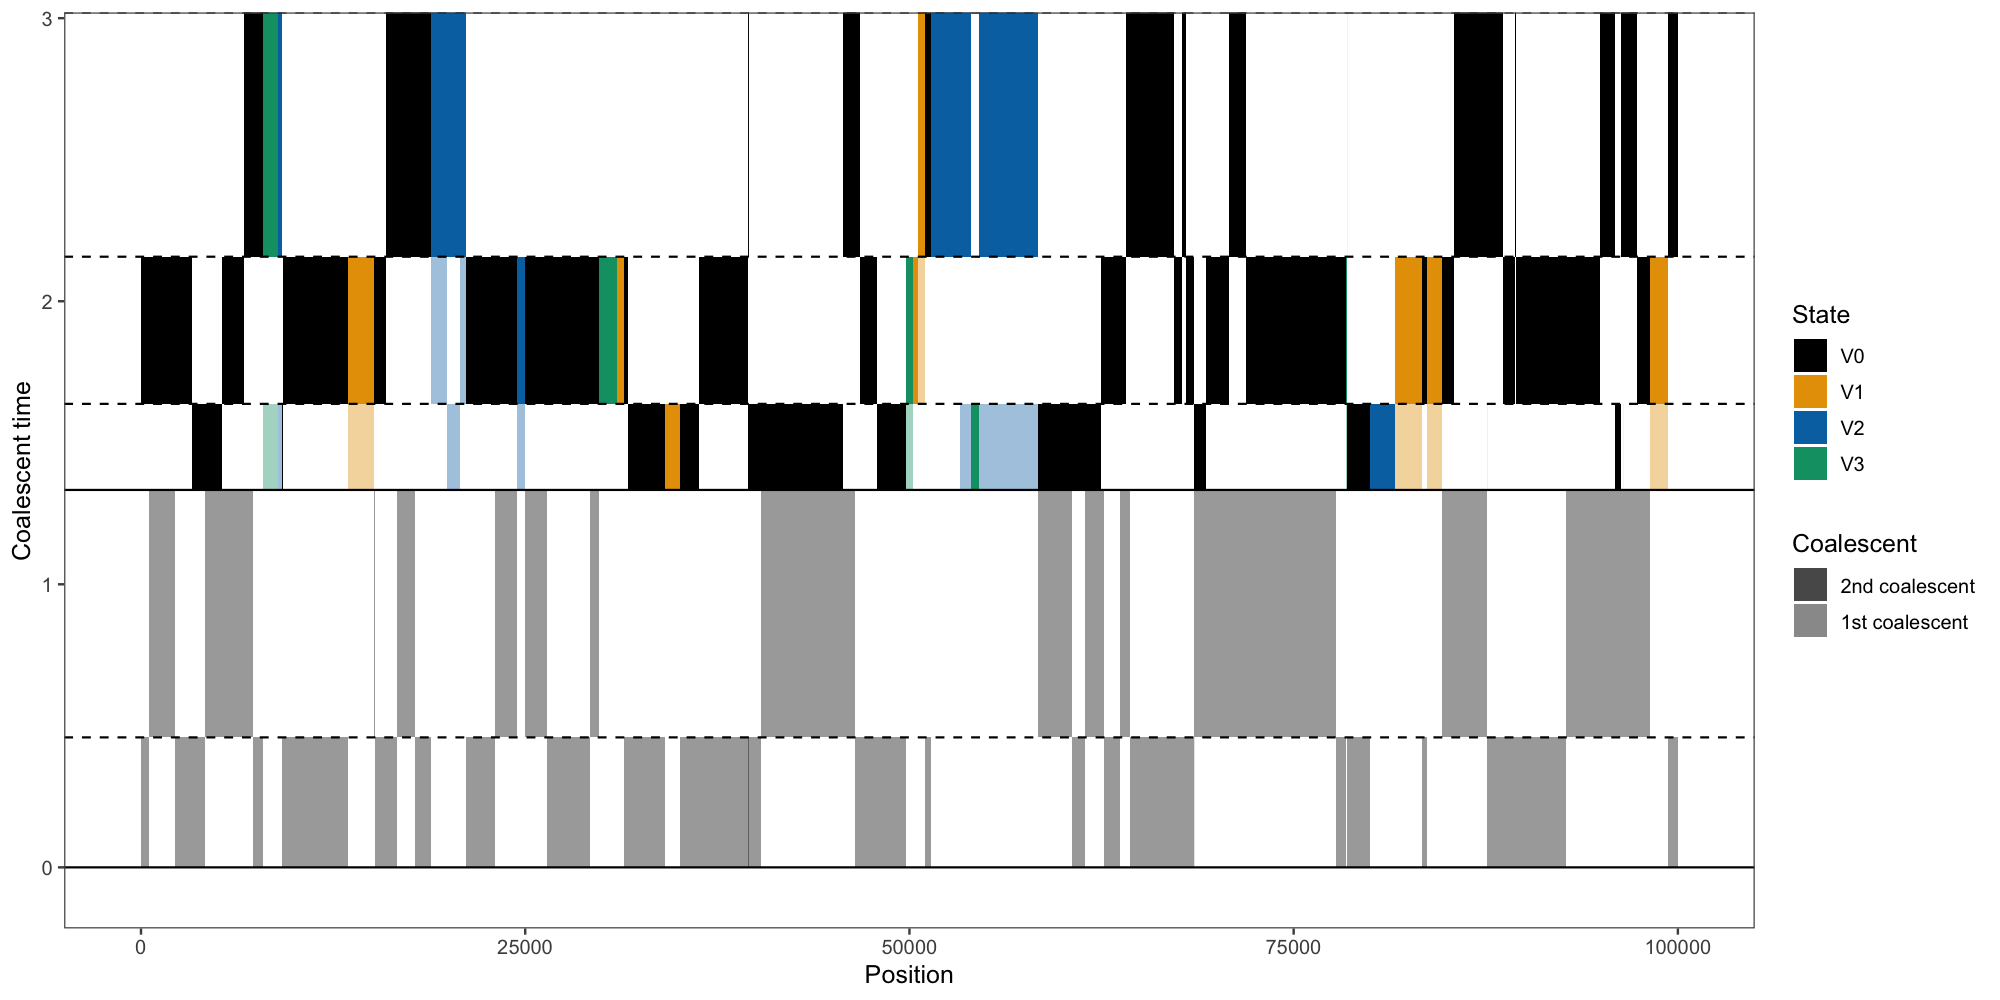

In [184]:
%%R -i df_HMM -i cut_HMM_AB -i cut_HMM_ABC -w 2000 -h 1000 -r 150

library(tidyverse)
library(ggthemes)

p1 <- df_HMM %>% 
    transmute(
        idx = 1:n(),
        state = paste0('V', as.character(`0`)),
        coal_1_min = `1`,
        coal_1_max = `3`,
        coal_2_min = `2`,
        coal_2_max = `4`
    ) %>%
    group_by(grp1 = with(rle(coal_1_min), rep(seq_along(lengths), lengths)),
             grp2 = with(rle(coal_1_max), rep(seq_along(lengths), lengths)),
             grp3 = with(rle(coal_2_min), rep(seq_along(lengths), lengths)),
             grp4 = with(rle(coal_2_max), rep(seq_along(lengths), lengths)),
             coal_1_min, coal_1_max, coal_2_min, coal_2_max, state
            ) %>%
    summarize(
        counter = n(),
        min_idx = min(idx),
        max_idx = max(idx),
        .groups = 'drop'
    ) %>%
    ungroup() %>%
    select(state, min_idx, max_idx, coal_1_min, coal_1_max, coal_2_min, coal_2_max, counter)  %>%
    arrange(min_idx) %>%
    ggplot() +
    geom_rect(aes(xmin = min_idx, xmax = max_idx+1, 
                  ymin = coal_1_min, ymax = coal_1_max, 
                  fill = state, alpha = '1st coalescent'), color = NA) +
    geom_rect(aes(xmin = min_idx, xmax = max_idx+1, 
                  ymin = coal_2_min, ymax = coal_2_max, 
                  fill = state, alpha = '2nd coalescent'), color = NA) +
    geom_hline(aes(yintercept = x), linetype = 2, data = tibble(x = cut_HMM_AB[2:(length(cut_HMM_AB)-1)])) +
    geom_hline(aes(yintercept = x), linetype = 2, data = tibble(x = cut_HMM_ABC[-1])) +
    geom_hline(aes(yintercept = x), data = tibble(x = c(cut_HMM_AB[1], cut_HMM_ABC[1]))) +
    theme_few() +
    scale_alpha_manual('Coalescent', values = c(1, 0.4), breaks = c('2nd coalescent', '1st coalescent')) +
    scale_fill_manual('State', values = c('black','#E69F00','#0072B2','#009E73','#CC79A7')) +
    labs(x = 'Position', y = 'Coalescent time') +
    scale_y_continuous(expand = expansion(mult = c(0.1, 0.4)))
    
p1

In [185]:
from ilsmc.get_emission_prob_mat import get_emission_prob_mat
import pandas as pd


emissions = get_emission_prob_mat(
    t_A,    t_B,    t_AB,    t_C,  t_upper, t_peak, 
    rho_A,  rho_B,  rho_AB,  rho_C,  rho_ABC, 
    coal_A, coal_B, coal_AB, coal_C, coal_ABC,
    n_int_AB, n_int_ABC,
    mu_A, mu_B, mu_C, mu_D, mu_AB, mu_ABC
)

In [198]:
df = pd.melt(emissions, id_vars=['hidden_state'])

emitted_state = []

np.random.seed(0)
np.random.seed(1)

for i in range(n_pos):
    
    filtered_df = df.loc[df['hidden_state'] == lst_states[i]]
    emitted_state.append(np.random.choice(
            filtered_df['variable'], 
            p = filtered_df['value']
        ))


In [199]:
sp1 = []
sp2 = []
sp3 = []
sp4 = []
for i in emitted_state:
    sp1.append(i[0])
    sp2.append(i[1])
    sp3.append(i[2])
    sp4.append(i[3])


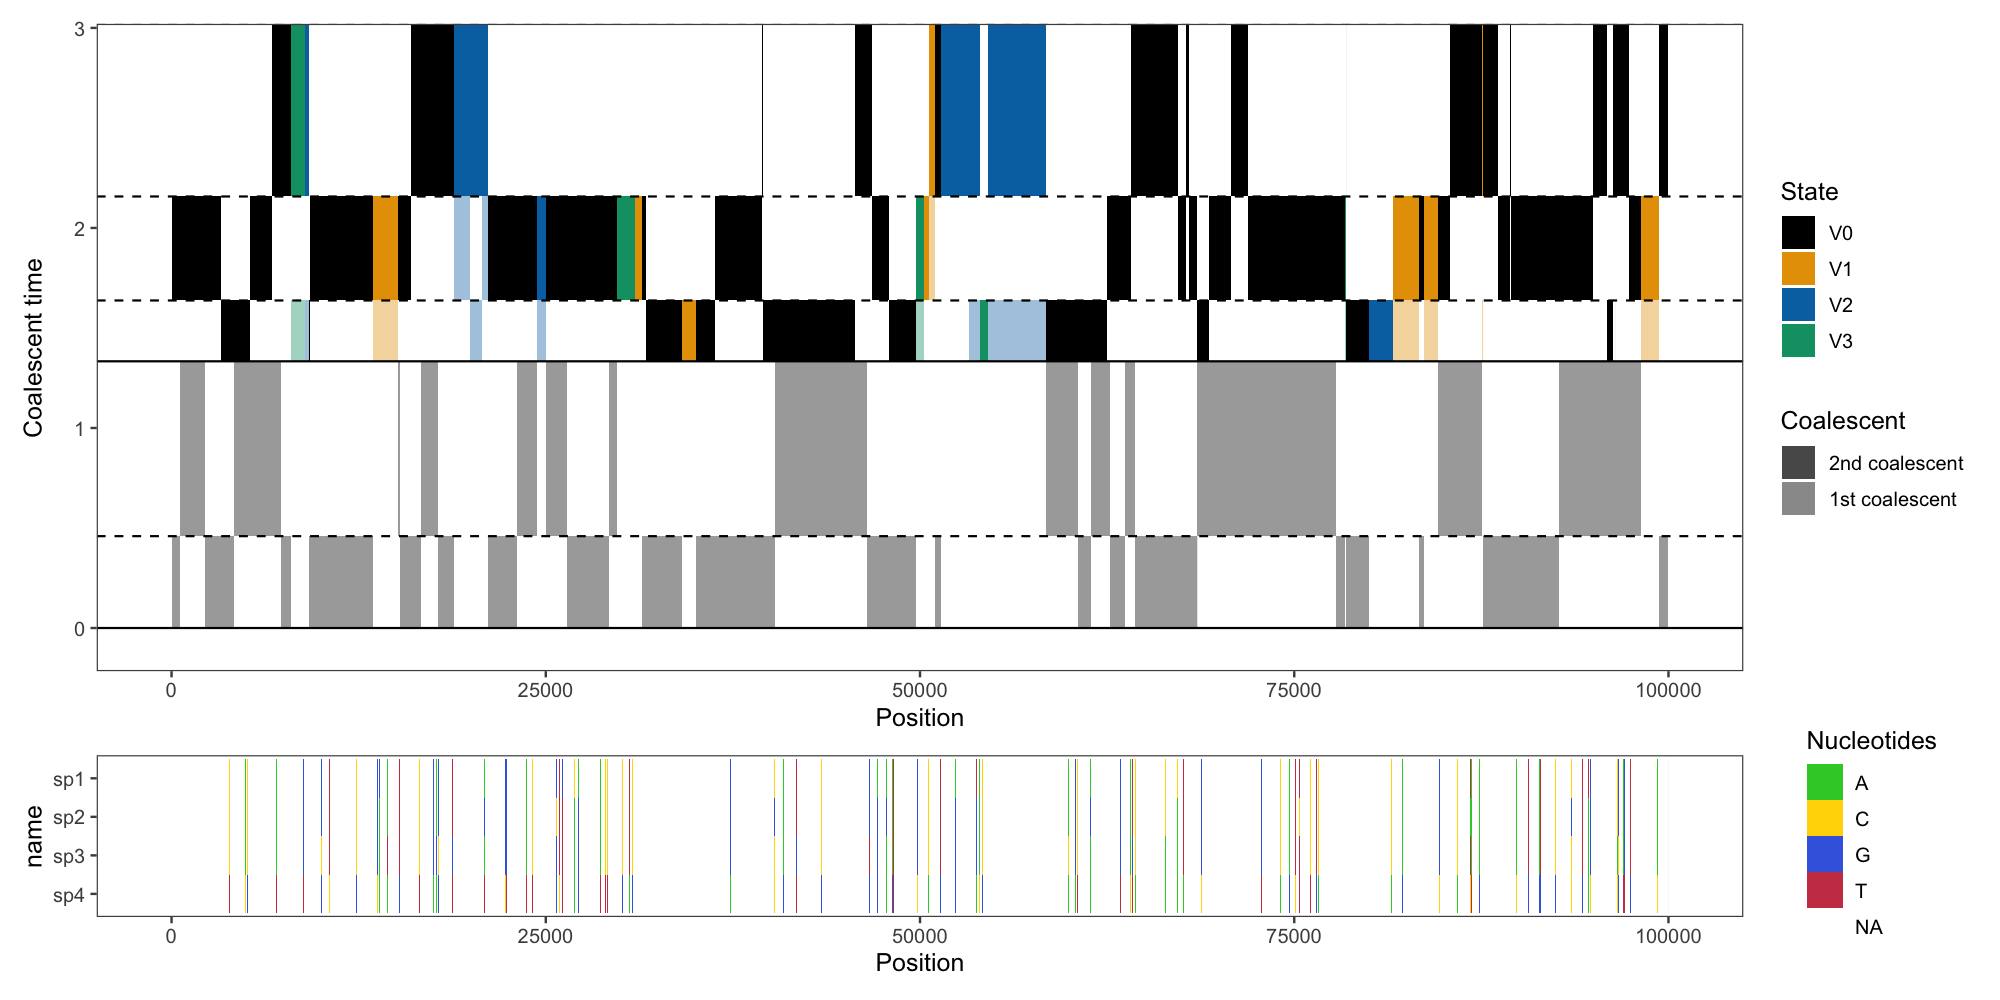

In [236]:
%%R -i sp1 -i sp2 -i sp3 -i sp4 -w 2000 -h 1000 -r 150

p2 <- tibble(
    pos = 1:length(sp1),
    sp1 = unlist(sp1),
    sp2 = unlist(sp2),
    sp3 = unlist(sp3),
    sp4 = unlist(sp4)
) %>%
    # top_n(500, pos) %>%
    pivot_longer(-pos) %>%
    group_by(pos) %>%
    mutate(
        colvar = length(unique(value)) == 1,
        value2 = ifelse(colvar, NA, value)
    ) %>%
    ggplot() +
    geom_tile(aes(pos, name, fill = value2)) +
    # geom_text(aes(pos, name, label = value)) +
    scale_fill_manual(name = 'Nucleotides', values = c('#32cd32', '#FFD700', '#4169e1', '#cb4154'), na.value = 'white') +
    theme_few() +
    scale_y_discrete(limits=rev) +
    xlab('Position')
    

library(patchwork)

lims = c(0, 100000)

(p1+coord_cartesian(xlim=lims))/(p2+coord_cartesian(xlim=lims)) + 
    plot_layout(heights = c(4, 1))

In [201]:
df2 = df.copy()
df2['hidden_state'] = [str(i) for i in df2['hidden_state']]
names_hidden = [str(i) for i in names_HMM]
trans = pd.DataFrame(trans_example)
trans.columns = ['S'+str(i) for i in list(trans.columns)]


In [202]:
%%R -i emitted_state -i df2 -i names_hidden -i trans_example -i pi_HMM -i trans_example

emitted_state <- unlist(emitted_state)
names_hidden <- unlist(names_hidden)
emitted_idx <- match(emitted_state, sort(unique(df2$variable)))
df3 <- df2 %>% 
    as_tibble() %>% 
    pivot_wider(names_from = 'variable', values_from = 'value') %>% 
    select(hidden_state, sort(unique(df2$variable))) %>% 
    mutate(hidden_state = factor(hidden_state, names_hidden)) %>% 
    arrange(hidden_state)

emission_probs <- select(df3, -hidden_state) %>% 
    as.matrix()
transition_probs <- unlist(trans_example) %>% matrix(ncol = length(names_hidden))

initial_probs <- unlist(pi_HMM)
 

In [203]:
%%R

logFrwdLikFct <- function(InitProb,TransProb,EmisProb,ObsSeq){
  # Number of observations
  len <- length(ObsSeq)
  # Number of hidden states
  nHS <- nrow(TransProb)
  # Define logForwardLik
  logForwardLik <- matrix(0,nrow=len,ncol=nHS)
  # Start condition
  logForwardLik[1,] <- log(InitProb*EmisProb[,ObsSeq[1]])
  # Determine logForwardLik by recursion 
  for(k in 2:len){
    a <- max(logForwardLik[k-1,])
    # Calculate the loglik of current iteration
    logForwardLik[k,] <- 
      log(colSums(
          (exp(logForwardLik[k-1,]-a)%*%TransProb)*EmisProb[,ObsSeq[k]]
      ))+a
  }  
  # a <- max(logForwardLik[len,])
  # logForwardLikVal <- log(sum(EndProb*exp(logForwardLik[len,]-a)))+a
  return(logForwardLik)
}

logBkwdLikFct <- function(TransProb,EmisProb,ObsSeq){
  # Number of observations
  len <- length(ObsSeq)
  # Number of hidden states
  nHS <- nrow(TransProb)
  # Define logBackwardLik
  logBackwardLik <- matrix(0,nrow=len,ncol=nHS)
  # Determine logForwardLik by recursion 
  for(k in (len-1):1){
    a <- max(logBackwardLik[k+1,])
    # Calculate the loglik of current iteration
    logBackwardLik[k,] <- 
      log(colSums(
          (exp(logBackwardLik[k+1,]-a)%*%TransProb)*EmisProb[,ObsSeq[k]]
      ))+a
  }  
  return(logBackwardLik)
}



In [204]:
%%R -o post_prob

# log(initial_probs*emission_probs[, emitted_idx[1]])

mat_forward <- logFrwdLikFct(initial_probs, transition_probs, emission_probs, emitted_idx)
mat_backward <- logBkwdLikFct(transition_probs, emission_probs, emitted_idx)
max_df <- apply(mat_forward+mat_backward, 1, which.max)


post_prob <- (mat_forward+mat_backward)
# Get state with maximum likelihood per row
# This is for doing the trick for very low probs
max_row <- apply(mat_forward+mat_backward, 1, max)
# Calculate the posterior probability per state
post_prob <- (exp(post_prob-max_row)/rowSums(exp(post_prob-max_row)))

In [205]:
df = pd.DataFrame(post_prob).melt(ignore_index = False)
df.reset_index(inplace=True)
df

,index,variable,value
0,0,0,0.189797
1,1,0,0.189744
2,2,0,0.189691
3,3,0,0.189638
4,4,0,0.189585
...,...,...,...
2399995,99995,23,0.010573
2399996,99996,23,0.010715
2399997,99997,23,0.010856
2399998,99998,23,0.010998


In [206]:
lst_states_str = [str(i) for i in lst_states]

In [207]:
%%R -i df -i lst_states_str -o x

lst_states_str <- unlist(lst_states_str)

x <- df %>%
    as_tibble() %>%
    group_by(index) %>%
    mutate(max_var = variable[which.max(value)]) %>% 
    arrange(index) %>%
    ungroup() %>%
    mutate(var_name = names_hidden[variable+1]) %>%
    select(-variable) %>%
    pivot_wider(values_from = value, names_from = var_name) %>%
    mutate(
        max_var = names_hidden[max_var+1],
        true_var = lst_states_str
    ) %>%
    select(index, ends_with('var'), everything())  %>%
    {.}
x

# A tibble: 100,000 × 27
   index max_var   true_var  `(0, 0, 0)` `(0, 0, 1)` `(0, 0, 2)` `(0, 1, 0)`
   <int> <chr>     <chr>           <dbl>       <dbl>       <dbl>       <dbl>
 1     0 (0, 1, 1) (0, 0, 1)       0.190       0.239     0.0100        0.155
 2     1 (0, 1, 1) (0, 0, 1)       0.190       0.239     0.00995       0.154
 3     2 (0, 1, 1) (0, 0, 1)       0.190       0.239     0.00987       0.154
 4     3 (0, 1, 1) (0, 0, 1)       0.190       0.239     0.00979       0.154
 5     4 (0, 1, 1) (0, 0, 1)       0.190       0.239     0.00970       0.154
 6     5 (0, 1, 1) (0, 0, 1)       0.190       0.239     0.00962       0.154
 7     6 (0, 1, 1) (0, 0, 1)       0.189       0.238     0.00954       0.154
 8     7 (0, 1, 1) (0, 0, 1)       0.189       0.238     0.00946       0.154
 9     8 (0, 1, 1) (0, 0, 1)       0.189       0.238     0.00937       0.154
10     9 (0, 1, 1) (0, 0, 1)       0.189       0.238     0.00929       0.154
# … with 99,990 more rows, and 20 more variables: (

In [208]:
%%R

y <- x %>%
    pivot_longer(-c(index, max_var, true_var)) %>%
    # separate(name, c('V', 'coal_1', 'coal_2'), ',')  %>%
    mutate(
        V = as.integer(str_sub(name, 2, 2)),
        coal_1 = as.integer(str_sub(name, 5, 5)),
        coal_2 = as.integer(str_sub(name, 8, 8)),
        deep = V != 0
    ) 
    
y_true <- x %>%
    mutate(
        V = as.integer(str_sub(true_var, 2, 2)),
        coal_1 = as.integer(str_sub(true_var, 5, 5)),
        coal_2 = as.integer(str_sub(true_var, 8, 8)),
        deep = V != 0
    ) %>%
    select(index, true_var, V, coal_1, coal_2, deep)

y_true

# A tibble: 100,000 × 6
   index true_var      V coal_1 coal_2 deep 
   <int> <chr>     <int>  <int>  <int> <lgl>
 1     0 (0, 0, 1)     0      0      1 FALSE
 2     1 (0, 0, 1)     0      0      1 FALSE
 3     2 (0, 0, 1)     0      0      1 FALSE
 4     3 (0, 0, 1)     0      0      1 FALSE
 5     4 (0, 0, 1)     0      0      1 FALSE
 6     5 (0, 0, 1)     0      0      1 FALSE
 7     6 (0, 0, 1)     0      0      1 FALSE
 8     7 (0, 0, 1)     0      0      1 FALSE
 9     8 (0, 0, 1)     0      0      1 FALSE
10     9 (0, 0, 1)     0      0      1 FALSE
# … with 99,990 more rows


`summarise()` has grouped output by 'index', 'true_var'. You can override using the `.groups` argument.


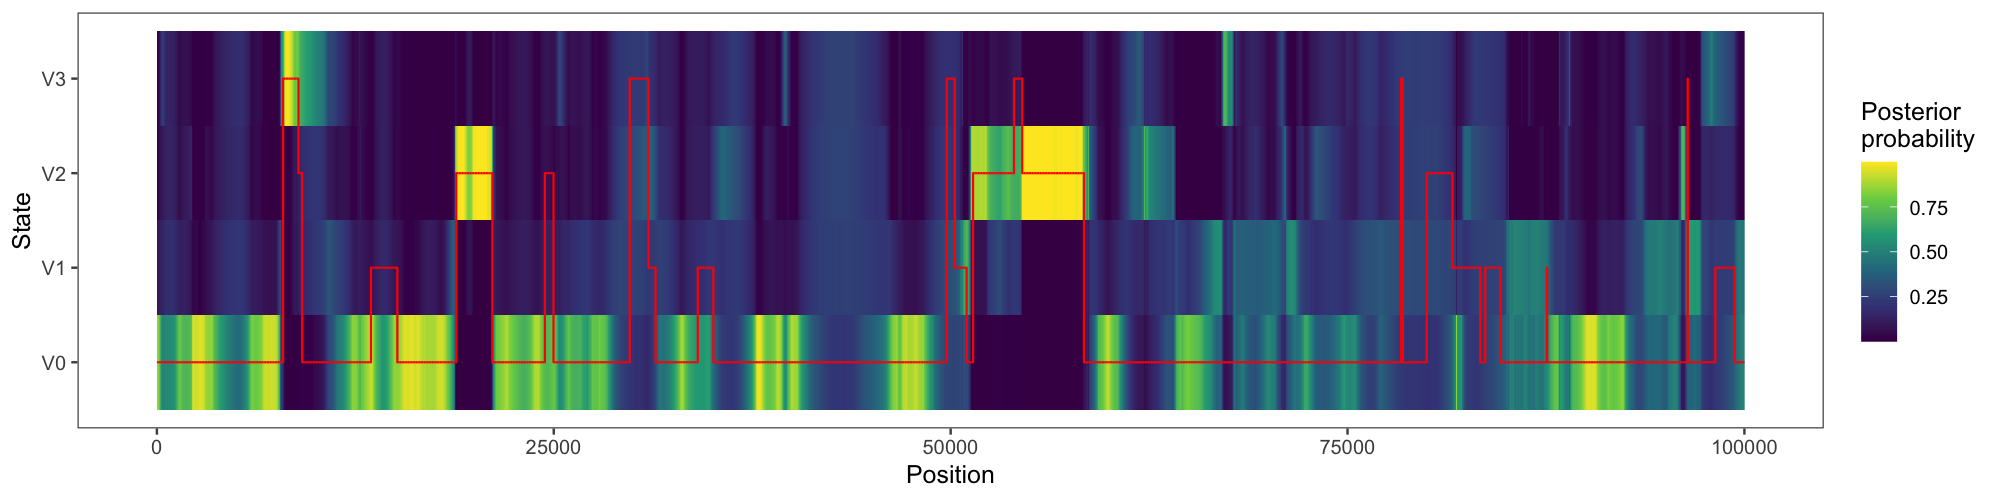

In [234]:
%%R -w 2000 -h 500 -r 150

state <- y %>%
    group_by(index, true_var, V) %>%
    summarize(prob = sum(value))
    
state_line_tab <- state %>% 
    group_by(index, true_var) %>% 
    filter(prob == max(prob))
    
state_plot <- state %>%
    ggplot() +
    geom_tile(aes(index, V, fill = prob),
             color = NA) +
    # geom_line(aes(index, V), color = 'red', 
    #           data = state_line_tab) +
    theme_few() +
    scale_fill_gradient(low = 'white', high = 'black')
    
state_plot_viridis <- state %>%
    ggplot() +
    geom_tile(aes(index, V, fill = prob),
             color = NA) +
    geom_line(aes(index, V), color = 'red', data = y_true) +
    # geom_line(aes(index, V), color = 'red', 
    #           data = state_line_tab) +
    theme_few() +
    scale_fill_viridis_c(name = 'Posterior\nprobability') +
    scale_y_continuous(
        breaks = c(0, 1, 2, 3), 
        labels = c('V0', 'V1', 'V2', 'V3')
    ) +
    ylab('State') +
    xlab('Position')
    
state_plot_true <- y_true %>%
    ggplot() +
    geom_tile(aes(index, V)) +
    # geom_line(aes(index, V), color = 'red', 
    #           data = state_line_tab) +
    theme_few() 
    
state_plot_viridis

`summarise()` has grouped output by 'index', 'true_var'. You can override using the `.groups` argument.


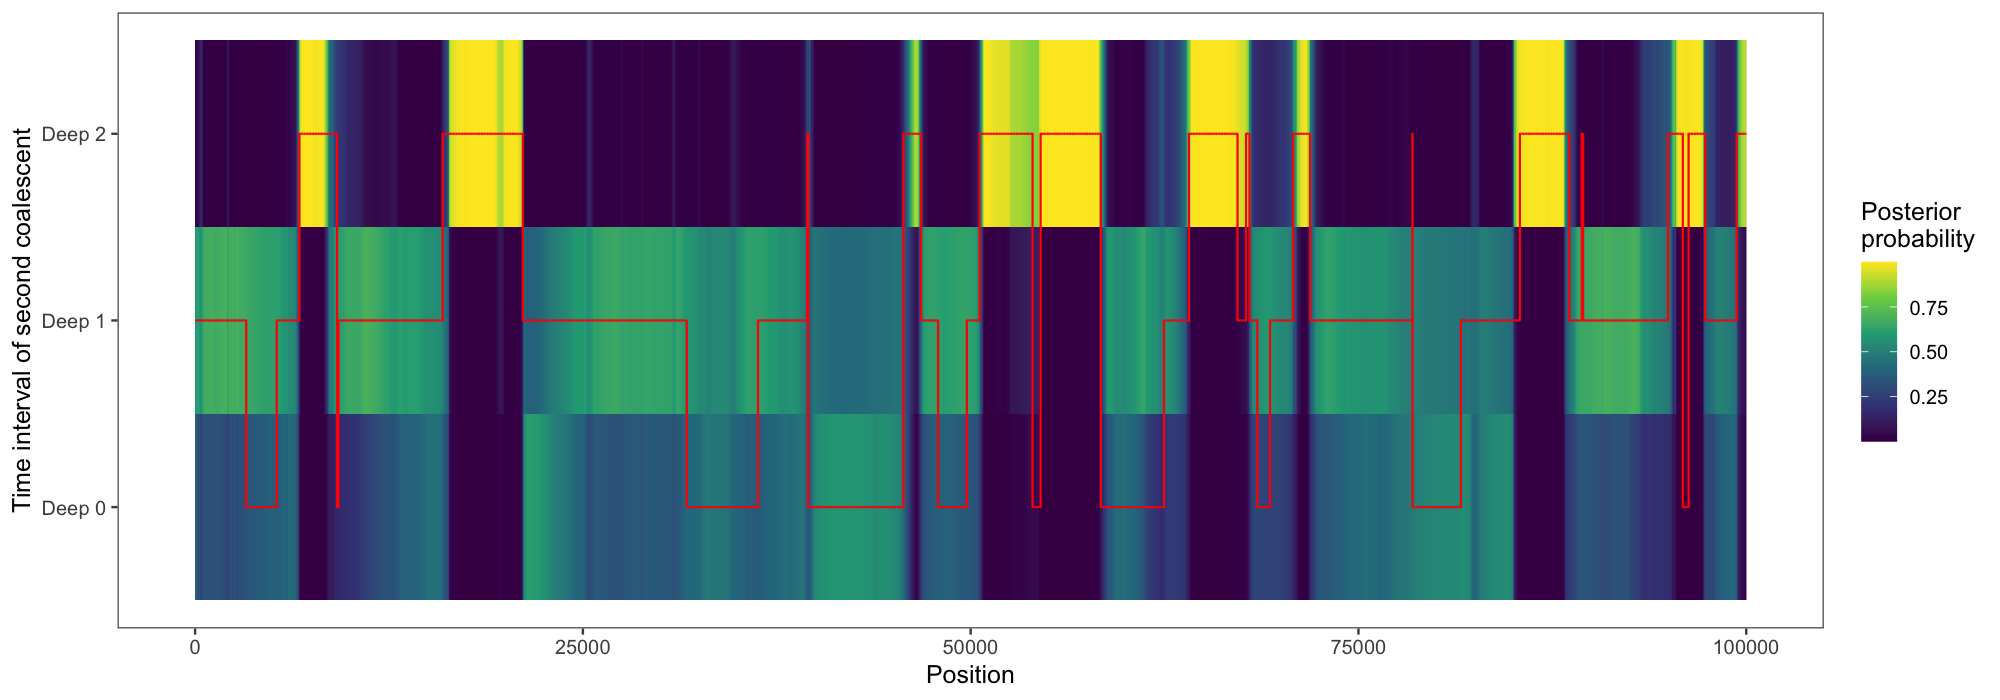

In [231]:
%%R -w 2000 -h 700 -r 150


second_coal <- y %>%
    group_by(index, true_var, coal_2) %>%
    summarize(prob = sum(value))

second_coal_line_tab <- second_coal %>% 
    group_by(index, true_var) %>% 
    filter(prob == max(prob))
    
second_coal_plot_viridis <- second_coal %>%
    ggplot() +
    geom_tile(aes(index, coal_2, fill = prob)) +
    geom_line(aes(index, coal_2), color = 'red', data = y_true) +
    # geom_line(aes(index, coal_2), color = 'red', 
    #           data = second_coal_line_tab) +
    theme_few() +
    scale_fill_viridis_c(name = 'Posterior\nprobability') +
    scale_y_continuous(
        breaks = c(0, 1, 2), 
        labels = c('Deep 0', 'Deep 1', 'Deep 2')
    ) +
    ylab('Time interval of second coalescent') +
    xlab('Position')

second_coal_plot <- second_coal %>%
    ggplot() +
    geom_tile(aes(index, coal_2, fill = prob)) +
    # geom_line(aes(index, coal_2), color = 'red', 
    #           data = second_coal_line_tab) +
    theme_few() +
    scale_fill_gradient(low = 'white', high = 'black')
    
second_coal_plot_true <- y_true %>%
    ggplot() +
    geom_tile(aes(index, coal_2)) +
    # geom_line(aes(index, coal_2), color = 'red', 
    #           data = second_coal_line_tab) +
    theme_few()
    

second_coal_plot_viridis



`summarise()` has grouped output by 'index', 'true_var', 'deep'. You can override using the `.groups` argument.


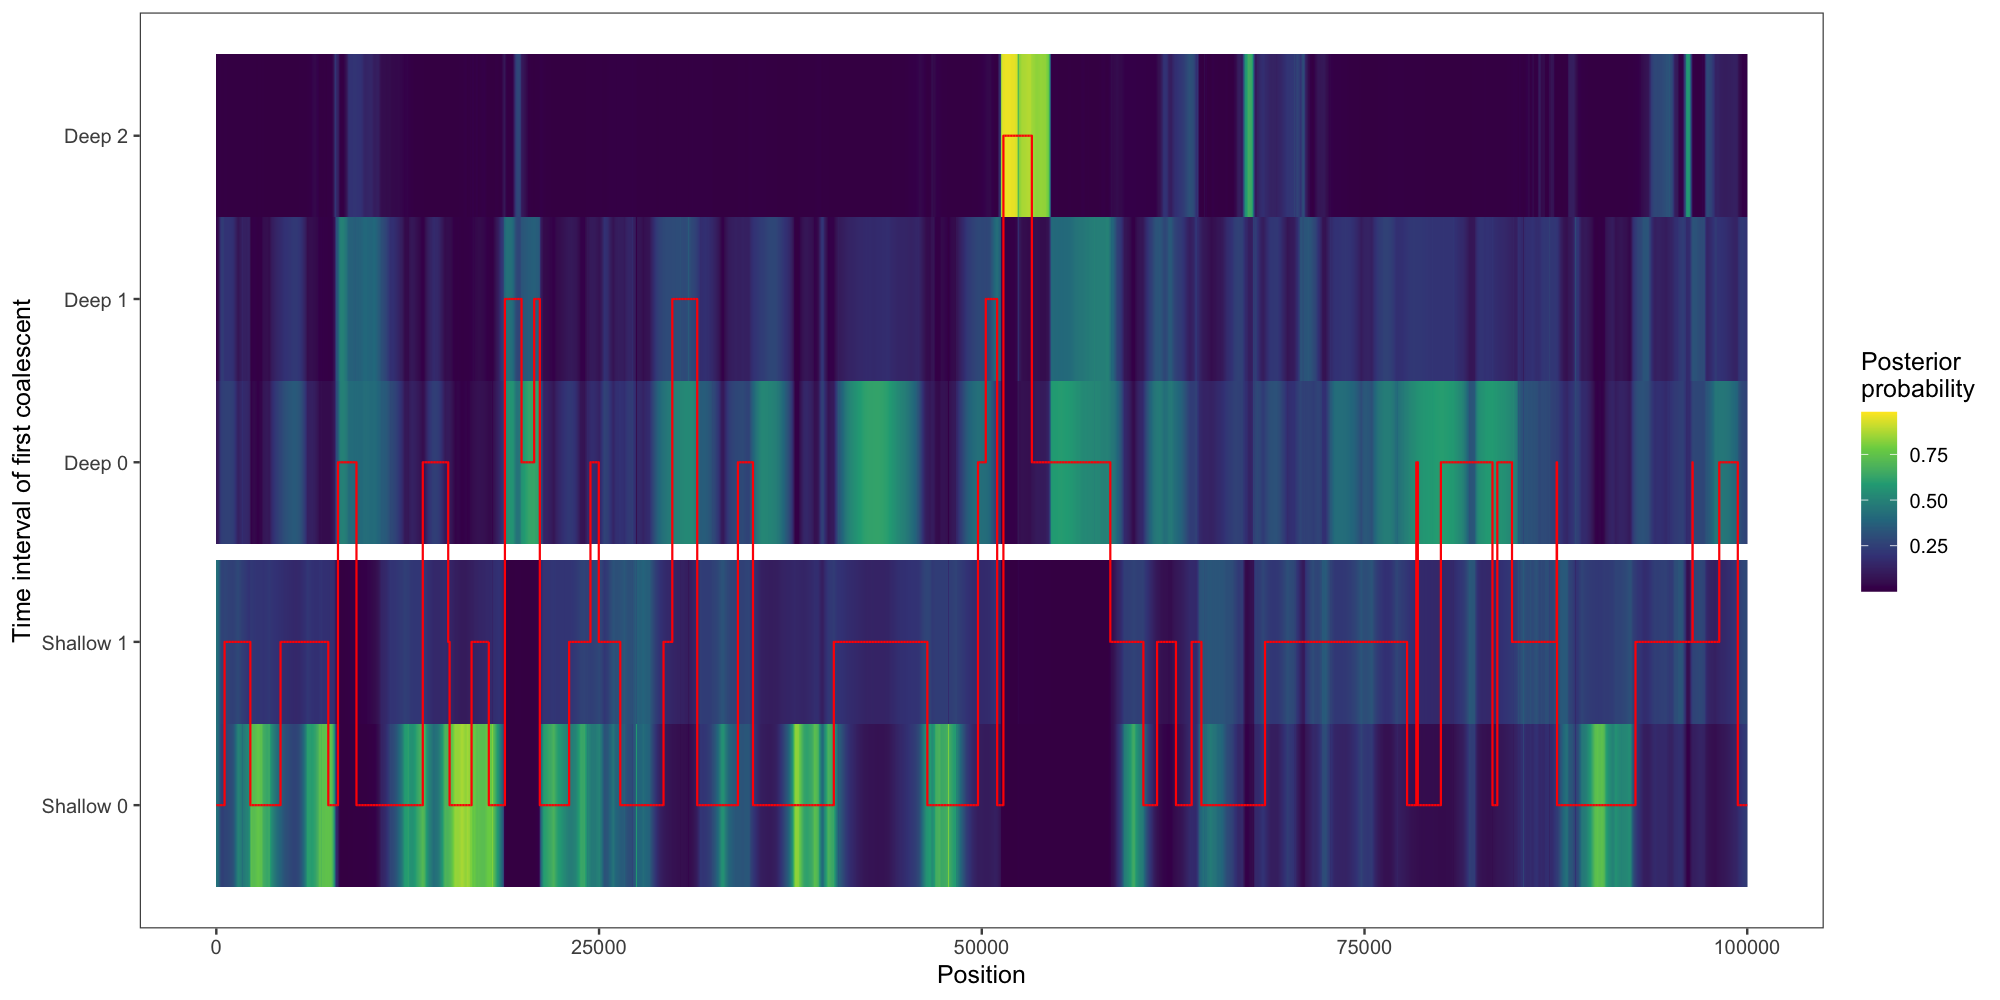

In [232]:
%%R -w 2000 -h 1000 -r 150

first_coal <- y %>%
    group_by(index, true_var, deep, coal_1) %>%
    summarize(prob = sum(value))
    
first_coal_line_tab <- first_coal %>% 
    group_by(index, true_var) %>% 
    filter(prob == max(prob))
    
first_coal_plot <- first_coal %>%
    ggplot() +
    geom_tile(aes(index, coal_1+deep*2, fill = prob))+
    # geom_line(aes(index, coal_1+deep*3), color = 'red', 
    #           data = first_coal_line_tab) +
    theme_few() +
    # facet_grid(-deep~.) +
    scale_fill_gradient(low = 'white', high = 'black')
    
first_coal_plot_viridis <- first_coal %>%
    ggplot() +
    geom_tile(aes(index, coal_1+deep*2.1, fill = prob))+
    geom_line(aes(index, coal_1+deep*2.1), color = 'red', data = y_true)+
    # geom_line(aes(index, coal_1+deep*3), color = 'red', 
    #           data = first_coal_line_tab) +
    theme_few() +
    # facet_grid(-deep~.) +
    scale_fill_viridis_c(name = 'Posterior\nprobability') +
    scale_y_continuous(
        breaks = c(0, 1, c(0, 1, 2)+2.1), 
        labels = c('Shallow 0', 'Shallow 1', 'Deep 0', 'Deep 1', 'Deep 2')
    ) +
    ylab('Time interval of first coalescent') +
    xlab('Position')
    
first_coal_plot_true <- y_true %>%
    ggplot() +
    geom_tile(aes(index, coal_1+deep*2))+
    # geom_line(aes(index, coal_1+deep*3), color = 'red', 
    #           data = first_coal_line_tab) +
    theme_few() +
    # facet_grid(-deep~.) +
    NULL
    
first_coal_plot_viridis

In [31]:
x.iloc[[70000]]

,index,max_var,true_var,"(0, 0, 0)","(0, 0, 1)","(0, 0, 2)","(0, 1, 0)","(0, 1, 1)","(0, 1, 2)","(0, 2, 0)",...,"(2, 0, 2)","(2, 1, 1)","(2, 1, 2)","(2, 2, 2)","(3, 0, 0)","(3, 0, 1)","(3, 0, 2)","(3, 1, 1)","(3, 1, 2)","(3, 2, 2)"
70001,70000,"(3, 1, 2)","(3, 1, 2)",6.607295e-07,7.088053e-07,0.000002,9.658365e-07,0.000001,0.000003,0.000002,...,0.000069,0.00004,0.000156,0.000733,0.000168,0.003978,0.182486,0.005038,0.523077,0.283491


In [37]:
x.iloc[[70000]]['(3, 0, 1)']

70001    0.003978
Name: (3, 0, 1), dtype: float64